<a href="https://colab.research.google.com/github/chloeahughes/Homelessness-in-California/blob/main/1_pre_processing_DATASCI_112_HOMELESS_RATES_IN_CALIFORNIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection and Cleaning**

### Introduction

Homelessness remains a pressing social issue in the California, the fifth largest economy in the world with $3.9 trillion GDP. Political governance plays a role in shaping policies that influence homelessness rates. But ultimately other factors do as well and can contribute in determining the behaviour of Homeless rates in relation to other factors. We sought to locate the most influential in predicting Homelessness rates behaviour in California, the Golden State, that once was a dream to many.

we want to understand [1]Which factor(s) among racial distribution, voter registration, housing index, and high school dropout rates is the best predictor of homeless rates by county in the State of California? [2] With what accuracy can we predict rates of homelessness using these factors?

overview of data:
[1]Total population of California by county, [2]rates of homeless people. Then collected [3]rates for race distribution including the groups: [White, Hispanic, Black, Asian, Native, Foreign born]. The Voter registration dataset allow us to locate [4]Political affiliation of the population [Democrats, Republicans]. [5]High school dropout rates and percentages of unschooled population.  [6]Zillow housing index ZHVI and ZORI per county. ZHVI measures typical home value listings and market trends across a smoothed, seasonally adjusted measure region. ZORI represents the entire rental housing stock (smoothed, repeat-rent index calculating the average market rent with the same percentile range).  All datasets were provided by the Government of California public information, allowing us to collect data from 2019. [1, 5, 6] csv file. [2, 3, 4, 5] web scraping .html, .xlsx, geospatial.


# **Data Collection: Full List of Datasets**


Research Question: Which variable is the best predictor of homelessness in a California county?

We will be answering our question by sourcing data from California counties in 2019 (with homelessness populations sourcing from 2017-2019 from our dataset. More on that below).

**General Data:**

Number of homeless in each cali county (web scraping):
https://information.auditor.ca.gov/reports/2020-112/accessible/statewide-homeless-accessible.html

Population of each county (xlsx):
https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-06.xlsx

**Variable 1: Race percentage (CSV)**
Joined CSV files with counts and percentages of pOpulation by race and county in California:
https://hdpulse.nimhd.nih.gov/data-portal/social/table?socialtopic=070&socialtopic_options=social_6&demo=00025&demo_options=pop_12&race=00&race_options=raceall_1&sex=0&sex_options=sex_3&age=001&age_options=ageall_1&statefips=06&statefips_options=area_states

**Variable 2: Political Affiliation (xlsx)**
Voter Registration (political affiliation of each county):
https://elections.cdn.sos.ca.gov/ror/ror-odd-year-2019/county.xlsx

**Variable 3: Zillow City Property Data (CSV files)**
https://www.zillow.com/research/data/
Zillow Home Value Index (ZHVI)
https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1741813121

Zillow Observed Rent Index (ZORI):
https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfrcondomfr_sm_month.csv?t=1741813121

**Variable 4: Dropout Rates (CSV):**
https://hdpulse.nimhd.nih.gov/data-portal/social/table?socialtopic=020&socialtopic_options=social_6&demo=00005&demo_options=education_3&race=00&race_options=race_7&sex=0&sex_options=sex_3&age=081&age_options=age25_1&statefips=06&statefips_options=area_states


POTENTIAL VARIABLE 5: FUNDING AMOUNT
from homeless population of each county


# **Data Collection: Scraping Web Data**

We will be scraping from https://elections.cdn.sos.ca.gov/ror/ror-odd-year-2019/county.pdf to identify the political affiliation of each county in California from 2019, and https://information.auditor.ca.gov/reports/2020-112/accessible/statewide-homeless-accessible.html to identify the number of homessless people in each county in California between 2017 and 2019.

Import files

In [ ]:
import pandas as pd
from google.colab import files
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import requests
from google.colab import drive

## RACE


In [ ]:
#paths
file_paths = {
    "White": "/content/white_population_rate.csv",
    "Black or African American": "/content/black_population_rate.csv",
    "Hispanic": "/content/hispanic_population_rate.csv",
    "Asian, Native Hawaiian or Pacific Islander": "/content/asian_population_rate.csv",
    "Foreign Born": "/content/foreignborn_population_rate.csv",
    "American Indian or Alaska Native": "/content/native_population_rate.csv"
}
# Dictionary
dfs = {}

for race, url in file_paths.items():
    df = pd.read_csv(url)

    # Standardize column names
    df.columns = df.columns.str.strip()
    df.rename(columns={df.columns[0]: "County"}, inplace=True)

    # Drop duplicate FIPS columns
    if "FIPS" in df.columns and race != "White":
        df.drop(columns=["FIPS"], inplace=True)

    for col in df.columns:
        if col not in ["County", "FIPS"]:
            df.rename(columns={col: f"{col}_{race}"}, inplace=True)

    # Sort by County
    df["County"] = df["County"].str.strip()
    df.sort_values(by="County", ascending=True, inplace=True)

    dfs[race] = df

#merge "County"
df_merged = dfs["White"]
for race, df in dfs.items():
    if race != "White":
        df_merged = df_merged.merge(df, on="County", how="outer")
df_merged

,County,FIPS,Value (Percent)_White,People (White)_White,Rank within US (of 3143 counties)_White,Value (Percent)_Black or African American,People (Black)_Black or African American,Rank within US (of 3143 counties)_Black or African American,Value (Percent)_Hispanic,People (Hispanic)_Hispanic,Rank within US (of 3143 counties)_Hispanic,"Value (Percent)_Asian, Native Hawaiian or Pacific Islander","People (API)_Asian, Native Hawaiian or Pacific Islander","Rank within US (of 3143 counties)_Asian, Native Hawaiian or Pacific Islander",Value (Percent)_Foreign Born,People (Foreign Born)_Foreign Born,Rank within US (of 3142 counties)_Foreign Born,Value (Percent)_American Indian or Alaska Native,People (AI/AN)_American Indian or Alaska Native,Rank within US (of 3143 counties)_American Indian or Alaska Native
0,Alameda County,6001,32.0,528396,"3,067",9.9,163859,776,23.3,385245,357,33.0,544859,9,34.1,563036,14,0.9,14764,706
1,Alpine County,6003,63.5,1076,"2,496",0.0,0,"3,025",14.7,249,587,0.5,8,"1,868",4.8,81,"1,004",27.0,458,45
2,Amador County,6005,77.8,31903,"1,922",2.0,825,"1,619",15.5,6361,547,1.5,613,757,6.0,2482,779,1.2,492,551
3,Butte County,6007,72.6,152117,"2,131",1.8,3712,"1,676",19.5,40829,436,5.7,11979,148,8.0,16810,541,1.2,2586,551
4,Calaveras County,6009,80.8,37159,"1,761",1.2,529,"1,924",13.9,6403,620,2.4,1090,466,5.8,2674,817,1.5,676,460
5,Colusa County,6011,51.2,11210,"2,838",1.4,311,"1,841",62.3,13639,51,0.7,159,"1,470",27.5,6029,40,1.4,308,481
6,Contra Costa County,6013,43.5,505202,"2,943",8.5,98346,834,27.3,316799,277,19.0,220551,22,26.2,303817,47,0.9,9941,706
7,Del Norte County,6015,67.1,18316,"2,362",2.9,805,"1,407",19.6,5350,433,3.6,975,287,7.6,2083,582,7.0,1911,151
8,El Dorado County,6017,79.9,153632,"1,820",0.9,1644,"2,118",14.2,27230,605,5.4,10323,164,9.1,17538,441,0.6,1189,936
9,Fresno County,6019,41.8,423296,"2,965",4.4,44392,"1,180",54.1,547669,89,11.2,113114,53,19.7,199854,113,1.4,14036,481


In [ ]:
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("white_population.csv")

#eort by the 'County' column alphabetically
df_sorted = df.sort_values(by="County", ascending=True)
sorted_file_path = "/content/white_population.csv"
df_sorted.to_csv(sorted_file_path, index=False)
df_sorted



,County,FIPS,Value (Percent),People (White),Rank within US (of 3143 counties)
0,Alameda County,6001.0,32.0,528396.0,"3,067"
1,Alpine County,6003.0,63.5,1076.0,"2,496"
2,Amador County,6005.0,77.8,31903.0,"1,922"
3,Butte County,6007.0,72.6,152117.0,"2,131"
4,Calaveras County,6009.0,80.8,37159.0,"1,761"
...,...,...,...,...,...
59,Tulare County,6107.0,42.6,202844.0,"2,956"
60,Tuolumne County,6109.0,82.6,45309.0,"1,647"
61,Ventura County,6111.0,58.6,491174.0,"2,674"
62,Yolo County,6113.0,54.8,119349.0,"2,775"


### Total Population of Each County

In [ ]:
#load Excel
excel_file_url = "https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-06.xlsx"
df_population = pd.read_excel(excel_file_url, sheet_name=0)

#keep only county name and total population
df_population = df_population.iloc[:, [0, -1]]
df_population.columns = ["county", "total_population_2019"]

#standardize county names
df_population["county"] = (
    df_population["county"]
    .str.lower()
    .str.replace(" county", "", regex=False)
    .str.strip()
    .str.title()  # Capitalizes first letter
    .str.lstrip(".")  # Removes leading period
    .str.split(",").str[0]  # Keeps only first part before a comma
)


df_pop = df_population.iloc[4:62].reset_index(drop=True)

df_pop.to_csv("cleaned_county_population.csv", index=False)
df_pop.head()

,county,total_population_2019
0,Alameda,1671329.0
1,Alpine,1129.0
2,Amador,39752.0
3,Butte,219186.0
4,Calaveras,45905.0


### Number of Homelessness
HTML scraping is a little more challenging, so we need a more unique approach.

In [ ]:
!pip install requests beautifulsoup4 pandas


In [ ]:
url = "https://information.auditor.ca.gov/reports/2020-112/accessible/statewide-homeless-accessible.html"
response = requests.get(url)


In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')  # Create BeautifulSoup object
tables = soup.find_all("table")
homeless_table = tables[0]  # Get first table

In [ ]:
headers = [header.text.strip() for header in homeless_table.find_all("th")]
columns = [ #DO NOT EDIT THIS, will cut to 0
    "CoC Code",
    "CoC Name",
    "Year",
    "Count of Sheltered Homeless",
    "Count of Unsheltered Homeless",
    "Count of Total Homeless",
    "Funding Amount",
    "Assembly Districts",
    "Senate Districts"
]

rows = []
for row in homeless_table.find_all("tr")[1:]:
    cells = row.find_all(["th", "td"])
    row_data = [cell.text.strip() for cell in cells]
    rows.append(row_data)
structured_rows = []
for row in rows:
    if len(row) == len(columns):
        structured_rows.append(row)
#convert to df
df_structured = pd.DataFrame(structured_rows, columns=columns)
df_structured.to_csv("cleaned_county_homeless.csv", index=False)
df_structured
files.download("cleaned_county_homeless.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Voter Registration

In [ ]:
# xlsx to csv
excel_path = "https://elections.cdn.sos.ca.gov/ror/ror-odd-year-2019/county.xlsx"
#convert to df
df_xlsx = pd.read_excel(excel_path, sheet_name=0)
csv_path_voter = "cleaned_county_voter.csv"
df_xlsx.to_csv(csv_path_voter, index=False, encoding="utf-8-sig")
df_voter = pd.read_csv(csv_path_voter)

## Zillow
### Zillow Data
ZHVI is defined as A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure. Zillow publishes top-tier ZHVI (typical value for homes within the 65th to 95th percentile range for a given region) and bottom-tier ZHVI (typical value for homes within the 5th to 35th percentile range for a given region).


ZORI is defined as a smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 35th to 65th percentile range for all homes and apartments in a given region, which is weighted to reflect the rental housing stock.

**Goals:**

Code to group cities (data per city) into counties.

Ouputs california counties with aggregated city data of each county.

In [ ]:
#ZHVI
file_path = "https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1741813121"
df = pd.read_csv(file_path)

#select relevant columns: RegionName, StateName, and all columns starting with "2019"
selected_columns = ["RegionName", "StateName"] + [col for col in df.columns if col.startswith("2019")]
df_selected = df[selected_columns].copy()

#define California city-to-county mapping
city_to_county = {
    "Los Angeles": "Los Angeles County",
    "San Francisco": "San Francisco County",
    "San Diego": "San Diego County",
    "San Jose": "Santa Clara County",
    "Fresno": "Fresno County",
    "Sacramento": "Sacramento County",
    "Long Beach": "Los Angeles County",
    "Oakland": "Alameda County",
    "Bakersfield": "Kern County",
    "Anaheim": "Orange County",
    "Santa Ana": "Orange County",
    "Riverside": "Riverside County",
    "Stockton": "San Joaquin County",
    "Chula Vista": "San Diego County",
    "Irvine": "Orange County",
    "Fremont": "Alameda County",
    "San Bernardino": "San Bernardino County",
    "Modesto": "Stanislaus County",
    "Oxnard": "Ventura County",
    "Fontana": "San Bernardino County",
    "Santa Clarita": "Los Angeles County",
}

#extract city name (before comma) and map to county
df_selected["City"] = df_selected["RegionName"].str.split(",").str[0]
df_selected["County"] = df_selected["City"].map(city_to_county)

#drop non-California rows (i.e., where County is NaN)
df_selected = df_selected.dropna(subset=["County"])

#group by county and aggregate city data
county_aggregated = df_selected.groupby("County").agg({
    "RegionName": lambda x: list(x.unique()),  # List of unique cities in the county
    **{col: "sum" for col in df_selected.columns if col.startswith("2019")},  # Sum numerical data for 2019
}).reset_index()

output_file = "cleaned_county_zhvi.csv"
county_aggregated.to_csv(output_file, index=False)
output_file


'cleaned_county_zhvi.csv'

In [ ]:
#ZORI
file_path = "https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfrcondomfr_sm_month.csv?t=1741813121"
df = pd.read_csv(file_path)

selected_columns = ["RegionName", "StateName"] + [col for col in df.columns if col.startswith("2019")]
df_selected = df[selected_columns].copy()
city_to_county = {
    "Los Angeles": "Los Angeles County",
    "San Francisco": "San Francisco County",
    "San Diego": "San Diego County",
    "San Jose": "Santa Clara County",
    "Fresno": "Fresno County",
    "Sacramento": "Sacramento County",
    "Long Beach": "Los Angeles County",
    "Oakland": "Alameda County",
    "Bakersfield": "Kern County",
    "Anaheim": "Orange County",
    "Santa Ana": "Orange County",
    "Riverside": "Riverside County",
    "Stockton": "San Joaquin County",
    "Chula Vista": "San Diego County",
    "Irvine": "Orange County",
    "Fremont": "Alameda County",
    "San Bernardino": "San Bernardino County",
    "Modesto": "Stanislaus County",
    "Oxnard": "Ventura County",
    "Fontana": "San Bernardino County",
    "Santa Clarita": "Los Angeles County",
}

df_selected["City"] = df_selected["RegionName"].str.split(",").str[0]
df_selected["County"] = df_selected["City"].map(city_to_county)
df_selected = df_selected.dropna(subset=["County"])

county_aggregated = df_selected.groupby("County").agg({
    "RegionName": lambda x: list(x.unique()),  # List of unique cities in the county
    **{col: "sum" for col in df_selected.columns if col.startswith("2019")},  # Sum numerical data for 2019
}).reset_index()

output_file = "cleaned_county_zori.csv"
county_aggregated.to_csv(output_file, index=False)
output_file


'cleaned_county_zori.csv'

### High School Dropout Rate

In [ ]:
#go to website:
#click on "download"
file_path = "/content/HDPulse_data_export (5).csv" #modify number as necessary
df = pd.read_csv(file_path, skiprows=5, encoding="utf-8")

df_dropout = df.iloc[2:].reset_index(drop=True) #first 2 rows are saved as cali, US,, unnecessary

df_dropout.to_csv("cleaned_county_dropout.csv", index=False)

# **Data Cleaning**

Cleaning up elements in the data. Ensure that each row represents a county in California, counties are in alphabetical order, county column is titled "county". Ensure each county is sorted alphabetically for  merge

In [ ]:
#all California counties in lowercase
california_counties = sorted([
    "alameda", "alpine", "amador", "butte", "calaveras", "colusa", "contra costa", "del norte", "el dorado",
    "fresno", "glenn", "humboldt", "imperial", "inyo", "kern", "kings", "lake", "lassen", "los angeles",
    "madera", "marin", "mariposa", "mendocino", "merced", "modoc", "mono", "monterey", "napa", "nevada",
    "orange", "placer", "plumas", "riverside", "sacramento", "san benito", "san bernardino", "san diego",
    "san francisco", "san joaquin", "san luis obispo", "san mateo", "santa barbara", "santa clara",
    "santa cruz", "shasta", "sierra", "siskiyou", "solano", "sonoma", "stanislaus", "sutter", "tehama",
    "trinity", "tulare", "tuolumne", "ventura", "yolo", "yuba"
])

### Population

In [ ]:
df_population = pd.read_csv("cleaned_county_population.csv")

for col in df_population.columns:
    if "county" in col.lower():
        df_population.rename(columns={col: "county"}, inplace=True)
        break  # Stop renaming once 'county' is found

if "county" not in df_population.columns:
    raise ValueError("No 'county' column found in the dataset!")

#standardize county names
df_population["county"] = df_population["county"].astype(str).str.lower().str.strip()

#match county names to the official list
def standardize_county_name(row):
    for county in california_counties:
        if county in row["county"]:
            return county  # Return the standardized county name
    return row["county"]  # If no match is found, keep original name

df_population["county"] = df_population.apply(standardize_county_name, axis=1)

df_population = df_population.sort_values(by="county").reset_index(drop=True)
df_population.to_csv("county_pop.csv", index=False)


### homeless

In [ ]:
df_homeless = pd.read_csv("cleaned_county_homeless.csv")

df_homeless["county"] = df_homeless["CoC Name"].astype(str).str.lower().str.strip()
def standardize_county_name(row):
    for county in california_counties:
        if county in row["county"]:
            return county  # Return the standardized county name
    return row["county"]  # If no match is found, keep original name

df_homeless["county"] = df_homeless.apply(standardize_county_name, axis=1)

df_homeless = df_homeless.sort_values(by="county").reset_index(drop=True)
df_homeless.to_csv("county_homeless.csv", index=False)


### voter

In [ ]:
df_voter = pd.read_csv("cleaned_county_voter.csv")

for col in df_voter.columns:
    if "county" in col.lower():
        df_voter.rename(columns={col: "county"}, inplace=True)
        break  # Stop renaming once 'county' is found

if "county" not in df_voter.columns:
    raise ValueError("No 'county' column found in the dataset!")
df_voter["county"] = df_voter["county"].astype(str).str.lower().str.strip()

def standardize_county_name(row):
    for county in california_counties:
        if county in row["county"]:
            return county  # Return the standardized county name
    return row["county"]  # If no match is found, keep original name

df_voter["county"] = df_voter.apply(standardize_county_name, axis=1)
df_voter = df_voter.dropna().reset_index(drop=True) #previous NA values

df_voter = df_voter.sort_values(by="county").reset_index(drop=True)
df_voter.to_csv("county_vote.csv", index=False)


### zillow zhvi

In [ ]:
df_zhvi = pd.read_csv("cleaned_county_zhvi.csv")
df_zhvi.rename(columns={"County": "county"}, inplace=True)

for col in df_zhvi.columns:
    if "county" in col.lower():
        df_zhvi.rename(columns={col: "county"}, inplace=True)
        break  # Stop renaming once 'county' is found

if "county" not in df_zhvi.columns:
    raise ValueError("No 'county' column found in the dataset!")

df_zhvi["county"] = df_zhvi["county"].astype(str).str.lower().str.strip()

def standardize_county_name(row):
    for county in california_counties:
        if county in row["county"]:
            return county  # Return the standardized county name
    return row["county"]  # If no match is found, keep original name

df_zhvi["county"] = df_zhvi.apply(standardize_county_name, axis=1)
df_zhvi = df_zhvi.dropna().reset_index(drop=True) #previous NA values

df_zhvi = df_zhvi.sort_values(by="county").reset_index(drop=True)
df_zhvi.to_csv("county_zhvi.csv", index=False)

### zillow zori

In [ ]:
df_zori = pd.read_csv("cleaned_county_zori.csv")
df_zori.rename(columns={"County": "county"}, inplace=True)

for col in df_zori.columns:
    if "county" in col.lower():
        df_zori.rename(columns={col: "county"}, inplace=True)
        break  # Stop renaming once 'county' is found

if "county" not in df_zori.columns:
    raise ValueError("No 'county' column found in the dataset!")

df_zori["county"] = df_zori["county"].astype(str).str.lower().str.strip()

def standardize_county_name(row):
    for county in california_counties:
        if county in row["county"]:
            return county  # Return the standardized county name
    return row["county"]  # If no match is found, keep original name

df_zori["county"] = df_zori.apply(standardize_county_name, axis=1)
df_zori = df_zori.dropna().reset_index(drop=True) #previous NA values

df_zori = df_zori.sort_values(by="county").reset_index(drop=True)
df_zori.to_csv("county_zori.csv", index=False)


### dropout

In [ ]:
df_dropout = pd.read_csv("cleaned_county_dropout.csv")

for col in df_dropout.columns:
    if "county" in col.lower():
        df_dropout.rename(columns={col: "county"}, inplace=True)
        break  # Stop renaming once 'county' is found

if "county" not in df_dropout.columns:
    raise ValueError("No 'county' column found in the dataset!")

df_dropout["county"] = df_dropout["county"].astype(str).str.lower().str.strip()

def standardize_county_name(row):
    for county in california_counties:
        if county in row["county"]:
            return county  # Return the standardized county name
    return row["county"]  # If no match is found, keep original name

df_dropout["county"] = df_dropout.apply(standardize_county_name, axis=1)
df_dropout = df_dropout.sort_values(by="county").reset_index(drop=True)
df_dropout.to_csv("county_drop.csv", index=False)



# Data Visualizations

### Dropout rate

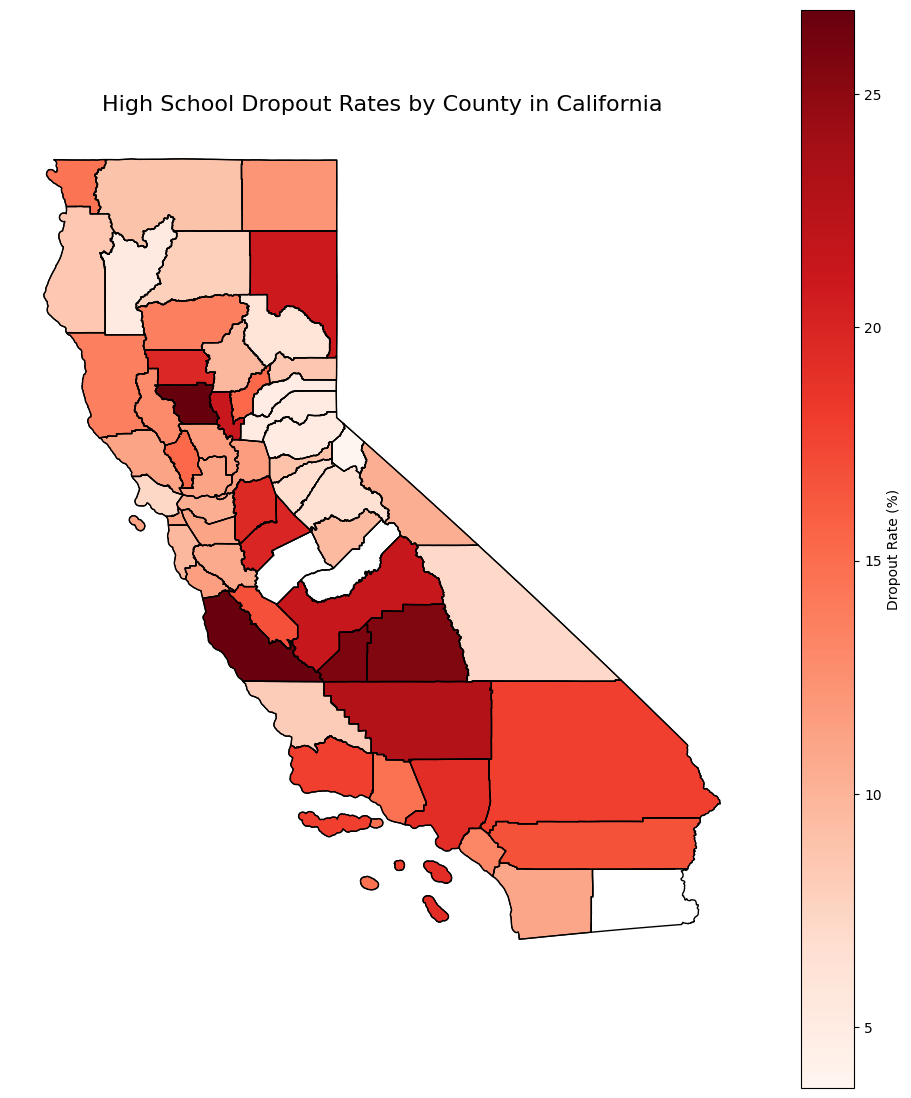

In [ ]:
file_path = "/content/cleaned_county_dropout.csv"

#adjust 'skiprows' based on previous findings
df = pd.read_csv(file_path, skiprows=5, encoding="utf-8")

df.columns = ["County", "FIPS", "Dropout Rate (%)", "Population", "Rank"]

#ensure FIPS is a string and properly formatted
df["FIPS"] = df["FIPS"].astype(str).str.zfill(5)  # Ensures 5-digit FIPS codes

#Load the California county shapefile
shapefile_path = "/content/ca_counties (1).zip"  # Update with actual path
counties_gdf = gpd.read_file(f"zip://{shapefile_path}")

# Identify correct FIPS column in the shapefile
if "COUNTY_FIP" in counties_gdf.columns:
    counties_gdf["FIPS"] = "06" + counties_gdf["COUNTY_FIP"].astype(str).str.zfill(3)
elif "GEOID" in counties_gdf.columns:
    counties_gdf["FIPS"] = counties_gdf["GEOID"].astype(str).str.zfill(5)
else:
    raise KeyError("No suitable FIPS column found in shapefile!")
# Convert FIPS column to string and remove NaN values
df["FIPS"] = df["FIPS"].astype(str).str.replace(r'[^0-9.]', '', regex=True)  # Remove non-numeric chars
df = df[df["FIPS"] != ""]  # Drop empty strings

# Convert to integer then back to string (to remove decimals)
df["FIPS"] = df["FIPS"].astype(float).astype(int).astype(str).str.zfill(5)
merged_gdf = counties_gdf.merge(df, on="FIPS", how="left")


fig, ax = plt.subplots(figsize=(12, 14))

# Plot county boundaries first (to ensure they exist)
counties_gdf.boundary.plot(ax=ax, linewidth=1, color="black")

# Plot dropout rates
merged_gdf.plot(column="Dropout Rate (%)", cmap="Reds", linewidth=0.8, edgecolor="black",
                legend=True, legend_kwds={'label': "Dropout Rate (%)", 'orientation': "vertical"},
                ax=ax)

ax.set_title("High School Dropout Rates by County in California", fontsize=16)
ax.axis("off")  # Hide axis for better visualization

plt.show()


In [ ]:
df.columns

Index(['CoC Code', 'CoC Name', 'Year', 'Count of Sheltered Homeless',
       'Count of Unsheltered Homeless', 'Count of Total Homeless',
       'Funding Amount', 'Assembly Districts', 'Senate Districts'],
      dtype='object')

In [ ]:
file_path = "/content/cleaned_county_homeless.csv"  # Update with the correct path
df = pd.read_csv(file_path, encoding="utf-8")

#a mapping of county names to FIPS codes for all California counties
county_to_fips = {
    "Alameda": "06001",
    "Alpine": "06003",
    "Amador": "06005",
    "Butte": "06007",
    "Calaveras": "06009",
    "Colusa": "06011",
    "Contra Costa": "06013",
    "Del Norte": "06015",
    "El Dorado": "06017",
    "Fresno": "06019",
    "Glenn": "06021",
    "Humboldt": "06023",
    "Imperial": "06025",
    "Inyo": "06027",
    "Kern": "06029",
    "Kings": "06031",
    "Lake": "06033",
    "Lassen": "06035",
    "Los Angeles": "06037",
    "Madera": "06039",
    "Marin": "06041",
    "Mariposa": "06043",
    "Mendocino": "06045",
    "Merced": "06047",
    "Modoc": "06049",
    "Mono": "06051",
    "Monterey": "06053",
    "Napa": "06055",
    "Nevada": "06057",
    "Orange": "06059",
    "Placer": "06061",
    "Plumas": "06063",
    "Riverside": "06065",
    "Sacramento": "06067",
    "San Benito": "06069",
    "San Bernardino": "06071",
    "San Diego": "06073",
    "San Francisco": "06075",
    "San Joaquin": "06077",
    "San Luis Obispo": "06079",
    "San Mateo": "06081",
    "Santa Barbara": "06083",
    "Santa Clara": "06085",
    "Santa Cruz": "06087",
    "Shasta": "06089",
    "Sierra": "06091",
    "Siskiyou": "06093",
    "Solano": "06095",
    "Sonoma": "06097",
    "Stanislaus": "06099",
    "Sutter": "06101",
    "Tehama": "06103",
    "Trinity": "06105",
    "Tulare": "06107",
    "Tuolumne": "06109",
    "Ventura": "06111",
    "Yolo": "06113",
    "Yuba": "06115"
}

# Apply this mapping to your dataset to ensure each county gets its corresponding FIPS code
df["FIPS"] = df["CoC Name"].map(county_to_fips)


# Extract county names from the "CoC Name" column
df["County"] = df["CoC Name"].str.extract(r"(\b[A-Za-z]+\s?[A-Za-z]*\b) County")

# Handle specific cases where "County" is not explicitly mentioned in the name
df.loc[df["CoC Name"].str.contains("San Francisco"), "County"] = "San Francisco"
df.loc[df["CoC Name"].str.contains("Santa Clara"), "County"] = "Santa Clara"

# Map extracted county names to FIPS codes
df["FIPS"] = df["County"].map(county_to_fips)

# Drop rows where FIPS could not be assigned
df = df.dropna(subset=["FIPS"])

# Ensure FIPS is a string and formatted correctly
df["FIPS"] = df["FIPS"].astype(str).str.zfill(5)

# Display the updated DataFrame
print(df[["CoC Name", "County", "FIPS"]].head())

# Save the updated file if needed
df.to_csv("/content/updated_county_homeless.csv", index=False)


                                 CoC Name         County   FIPS
0  San José/Santa Clara City & County CoC    Santa Clara  06085
1  San José/Santa Clara City & County CoC    Santa Clara  06085
2  San José/Santa Clara City & County CoC    Santa Clara  06085
3                       San Francisco CoC  San Francisco  06075
4                       San Francisco CoC  San Francisco  06075


In [ ]:
pip install fiona --upgrade


In [ ]:
import fiona

print(fiona.supported_drivers)


{'DXF': 'rw', 'CSV': 'raw', 'OpenFileGDB': 'raw', 'ESRIJSON': 'r', 'ESRI Shapefile': 'raw', 'FlatGeobuf': 'raw', 'GeoJSON': 'raw', 'GeoJSONSeq': 'raw', 'GPKG': 'raw', 'GML': 'rw', 'OGR_GMT': 'rw', 'GPX': 'rw', 'MapInfo File': 'raw', 'DGN': 'raw', 'S57': 'r', 'SQLite': 'raw', 'TopoJSON': 'r'}


In [ ]:
import os
shapefile_path = "/content/ca_counties (3).zip"

if not os.path.exists(shapefile_path):
    raise FileNotFoundError(f"Shapefile not found at {shapefile_path}")


In [ ]:
import zipfile

shapefile_path = "/content/ca_counties (3).zip"

# Check if the file exists
if not zipfile.is_zipfile(shapefile_path):
    raise FileNotFoundError("The shapefile zip does not exist or is corrupted.")

# List contents inside the zip file
with zipfile.ZipFile(shapefile_path, 'r') as z:
    print("Contents of the ZIP file:")
    print(z.namelist())


Contents of the ZIP file:
['CA_Counties.cpg', 'CA_Counties.dbf', 'CA_Counties.prj', 'CA_Counties.sbn', 'CA_Counties.sbx', 'CA_Counties.shp', 'CA_Counties.shp.xml', 'CA_Counties.shx']


In [ ]:
!pip install python-magic


In [ ]:
import magic

shapefile_path = "/content/ca_counties (3).zip"
file_type = magic.from_file(shapefile_path, mime=True)

print("File type:", file_type)


File type: application/zip


In [ ]:
import mimetypes

shapefile_path = "/content/ca_counties (3).zip"
file_type, _ = mimetypes.guess_type(shapefile_path)

print("File type:", file_type)


File type: application/zip


In [ ]:
df_pop = pd.read_csv("/content/cleaned_county_population.csv")
df_pop.head()

,county,total_population_2019
0,Alameda,1671329.0
1,Alpine,1129.0
2,Amador,39752.0
3,Butte,219186.0
4,Calaveras,45905.0


In [ ]:
# Sort the DataFrame by the "County" column in alphabetical order
df = df.sort_values(by="County", ascending=True)

In [ ]:
import pandas as pd

# Preprocess 'county' column in df1
df_pop["county"] = df_pop["county"].str.replace(r"\.|\s*,\s*california", "", regex=True).str.title()

# Preprocess 'County' column in df2 (standardizing the name)
df.rename(columns={"County": "county"}, inplace=True)

# Merge on 'county' column
merged_df = pd.merge(df_pop, df, on="county", how="inner")  # Use 'left' or 'right' merge if needed

# Display the first few rows to check
print(merged_df.head())


    county  total_population_2019 CoC Code  \
0  Alameda              1671329.0   CA-502   
1  Alameda              1671329.0   CA-502   
2  Alameda              1671329.0   CA-502   
3    Butte               219186.0   CA-519   
4    Butte               219186.0   CA-519   

                               CoC Name  Year Count of Sheltered Homeless  \
0  Oakland, Berkeley/Alameda County CoC  2017                       1,766   
1  Oakland, Berkeley/Alameda County CoC  2018                       1,633   
2  Oakland, Berkeley/Alameda County CoC  2019                       1,710   
3      Chico, Paradise/Butte County CoC  2019                         428   
4      Chico, Paradise/Butte County CoC  2018                         380   

  Count of Unsheltered Homeless Count of Total Homeless Funding Amount  \
0                         3,863                   5,629    $35,327,971   
1                         3,863                   5,496    $37,648,221   
2                         6,312       

In [ ]:
# Ensure numerical values for calculation
merged_df["Count of Total Homeless"] = pd.to_numeric(merged_df["Count of Total Homeless"], errors="coerce")
merged_df["total_population_2019"] = pd.to_numeric(merged_df["total_population_2019"], errors="coerce")

# Calculate % Homeless
merged_df["% Homeless"] = (merged_df["Count of Total Homeless"] / merged_df["total_population_2019"]) * 100


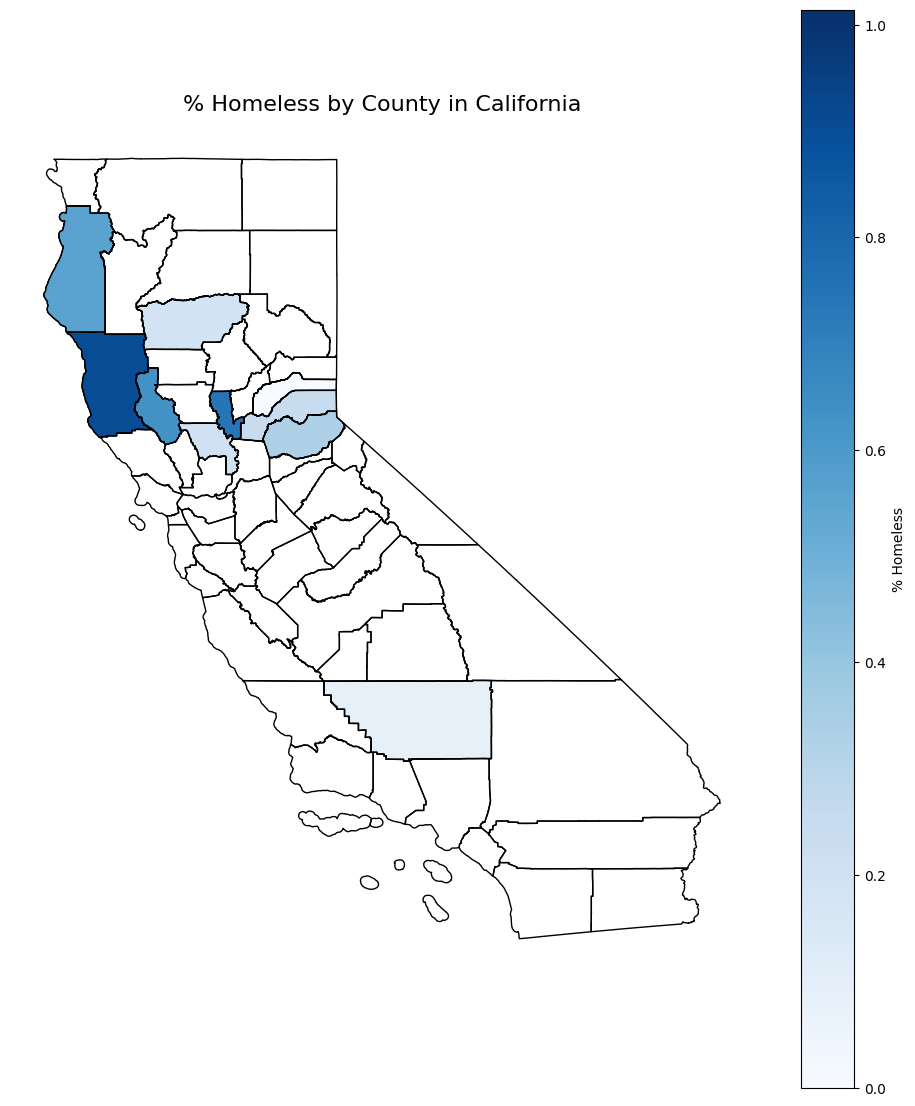

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ensure FIPS codes exist and are properly formatted in the shapefile
def format_fips_column(gdf):
    if "COUNTY_FIP" in gdf.columns:
        gdf["FIPS"] = "06" + gdf["COUNTY_FIP"].astype(str).str.zfill(3)
    elif "GEOID" in gdf.columns:
        gdf["FIPS"] = gdf["GEOID"].astype(str).str.zfill(5)
    else:
        raise KeyError("No suitable FIPS column found in shapefile!")
    return gdf

# Ensure FIPS exists and is correctly formatted in the homelessness dataset
def validate_fips_column(df):
    if "FIPS" not in df.columns:
        raise KeyError("The 'FIPS' column is missing in the dataset!")
    df["FIPS"] = df["FIPS"].astype(str).str.zfill(5)
    return df

# Load and format data
counties_gdf = format_fips_column(counties_gdf)
merged_df = validate_fips_column(merged_df)

# Merge homelessness data with county shapefile
merged_gdf = counties_gdf.merge(merged_df, on="FIPS", how="left")

# Ensure "% Homeless" exists in the dataset
if "% Homeless" not in merged_gdf.columns:
    raise KeyError("'% Homeless' column not found in the dataset!")

# Plot % Homeless by County
fig, ax = plt.subplots(figsize=(12, 14))

# Plot county boundaries first
counties_gdf.boundary.plot(ax=ax, linewidth=1, color="black")

# Plot homelessness rates
merged_gdf.plot(
    column="% Homeless",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={'label': "% Homeless", 'orientation': "vertical"},
    ax=ax
)

# Set title and hide axes
ax.set_title("% Homeless by County in California", fontsize=16)
ax.axis("off")

plt.show()
